## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>

Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке.

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее.

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф.
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет.


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

<IPython.core.display.Javascript object>

In [310]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


<IPython.core.display.Javascript object>

Прочитаем наш файл с исходными данными:

In [312]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


<IPython.core.display.Javascript object>

Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок.

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу.

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S').

Определите временные рамки (без учета времени), за которые представлены данные.

In [314]:
taxi_data['pickup_datetime'] = pd.to_datetime(
    taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
print("Начальная дата:", taxi_data['pickup_datetime'].min().date())
print("Конечная дата:", taxi_data['pickup_datetime'].max().date())

Начальная дата: 2016-01-01
Конечная дата: 2016-06-30


<IPython.core.display.Javascript object>

### Задание 2.2
Посмотрим на пропуски.
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [316]:
print("Пропущенных значений: ", taxi_data.isna().sum().sum())

Пропущенных значений:  0


<IPython.core.display.Javascript object>

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков.

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [318]:
# Статистические показания
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


<IPython.core.display.Javascript object>

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [320]:
def add_datetime_features(taxi_data):
    # преобразуем столбец с датой в datetime
    taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
    # добавляем столбец с датой включения счетчика
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date
    # добавляем столбец с часом включения счетчика
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour
    # добавляем столбец с наименованием дня недели
    taxi_data['pickup_day_of_week'] = taxi_data[
        'pickup_datetime'].dt.day_name()

    return taxi_data


taxi_data = add_datetime_features(taxi_data)


num_trips_on_saturday = len(
    taxi_data[taxi_data['pickup_day_of_week'] == 'Saturday'])
print('поездок было совершено в субботу: ', num_trips_on_saturday)


avg_trips_per_day = taxi_data.groupby('pickup_date')['id'].count().mean()
print('поездок в среднем совершается за день: ', round(avg_trips_per_day))

поездок было совершено в субботу:  220868
поездок в среднем совершается за день:  8015


<IPython.core.display.Javascript object>

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет).

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [323]:
# Считываем данные
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')


# Функция с добавленнием столбца pickup_holiday
def add_holiday_features(taxi_data, holiday_data):
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].apply(
        lambda x: 1 if str(x) in holiday_data['date'].values else 0)
    return taxi_data


# Объединяем таблицу через функцию
taxi_data = add_holiday_features(taxi_data, holiday_data)


# Рассчитываем медианную длительность поездки
median_duration_in_holidays = taxi_data[
    taxi_data['pickup_holiday'] == 1]['trip_duration'].median()
print('медианная длительность поездки: ', round(median_duration_in_holidays))

медианная длительность поездки:  585


<IPython.core.display.Javascript object>

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM?

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника.

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [324]:
# Считываем данные
osrm_data = pd.read_csv('data/osrm_data_train.csv')

<IPython.core.display.Javascript object>

In [326]:
# Функция для добавления 3 столбцов
def add_osrm_features(taxi_data, osrm_data):
    osrm_cols = ['id', 'total_distance',
                 'total_travel_time', 'number_of_steps']
    osrm_subset = osrm_data[osrm_cols]

    taxi_data = pd.merge(taxi_data, osrm_subset, on='id', how='left')
    return taxi_data


taxi_data = add_osrm_features(taxi_data, osrm_data)


# Рассчитываем разницу между медианной длительностью поездки
# и медианной длительностью поездки  из OSRM
duration_medians = taxi_data[
  'trip_duration'].median() - taxi_data['total_travel_time'].median()
print('разница (в секундах) состовляет: ', round(duration_medians))


# Рассчитываем сколько пропусков осталось
cols_null = taxi_data.isnull().sum()
cols_null = cols_null[cols_null > 0]
print('Количество пропусков по колонкам:\n', cols_null)

разница (в секундах) состовляет:  372
Количество пропусков по колонкам:
 total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64


<IPython.core.display.Javascript object>

функция для вычисления расстояния Хаверсина (в километрах)  и функция для вычисления угла направления движения (в градусах)

In [331]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

<IPython.core.display.Javascript object>

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [336]:
def add_geographical_features(taxi_data):
    taxi_data['haversine_distance'] = get_haversine_distance(
        lat1=taxi_data['pickup_latitude'],
        lng1=taxi_data['pickup_longitude'],
        lat2=taxi_data['dropoff_latitude'],
        lng2=taxi_data['dropoff_longitude'])
    taxi_data['direction'] = get_angle_direction(
        lat1=taxi_data['pickup_latitude'],
        lng1=taxi_data['pickup_longitude'],
        lat2=taxi_data['dropoff_latitude'],
        lng2=taxi_data['dropoff_longitude'])
    return taxi_data


taxi_data = add_geographical_features(taxi_data)


# Считаем медианное расстояние Хаверсина
print('Медианное расстояние Хаверсина: ',
      round(taxi_data['haversine_distance'].median(),2))

Медианное расстояние Хаверсина:  2.09


<IPython.core.display.Javascript object>

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [344]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))


# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)


# ваш код здесь
def add_cluster_features(taxi_data, kmeans):
    taxi_data['geo_cluster'] = kmeans.predict(taxi_data[
        ['pickup_latitude', 'pickup_longitude',
         'dropoff_latitude', 'dropoff_longitude']])
    return taxi_data


taxi_data = add_cluster_features(taxi_data, kmeans)


# Считаем кол-во поездок в наименьшем географическом кластере
smallest_cluster_size = taxi_data.groupby('geo_cluster').size().min()
print ('Наименьшее количество поездок в географическом кластере: ',
       smallest_cluster_size)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Наименьшее количество поездок в географическом кластере:  2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки.

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [356]:
weather_data = pd.read_csv('data/weather_data.csv')


def add_weather_features(taxi_data, weather_data):
    # Переводим признак time в тип данных datetime заданного формата
    weather_data['time'] = pd.to_datetime(weather_data['time'],
                                          format='%Y-%m-%d %H:%M:%S')
    # Извлекаем дату и час из столбца time в weather_data
    weather_data['date'] = weather_data['time'].dt.date
    weather_data['hour'] = weather_data['time'].dt.hour
    weather_data = weather_data[['temperature', 'visibility', 'wind speed',
                                 'precip', 'events', 'date', 'hour']]
    # Объединяем датафреймы taxi_data и weather_data
    taxi_data = taxi_data.merge(weather_data,
        left_on=['pickup_date', 'pickup_hour'],
        right_on=['date', 'hour'], how='left')
    # Удаляем столбцы date и hour
    taxi_data = taxi_data.drop(['date', 'hour'], axis=1)
    return taxi_data


taxi_data = add_weather_features(taxi_data, weather_data)


snowy_trips = taxi_data[
    (taxi_data['events'] == 'Snow') | (taxi_data['events'] == 'Snow Showers')]
num_snowy_trips = snowy_trips.shape[0]
print(f"{num_snowy_trips} поездки совершались в снежную погоду.")

13126 поездки совершались в снежную погоду.


<IPython.core.display.Javascript object>

In [361]:
weather_conditions = ['temperature', 'visibility',
                      'wind speed', 'precip', 'events']
columns_nan = taxi_data[weather_conditions].isnull().mean() * 100
print('Пропусков в столбцах с погодными условиями:\n', round(columns_nan, 2))

Пропусков в столбцах с погодными условиями:
 temperature    0.82
visibility     0.82
wind speed     0.82
precip         0.82
events         0.82
dtype: float64


<IPython.core.display.Javascript object>

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски.
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана).

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам.

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [373]:
def fill_null_weather_data(taxi_data):
    # Заполнение пропущенных значений в столбцах
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    taxi_data[weather_cols] = taxi_data.groupby(
        'pickup_date')[weather_cols].transform(lambda x: x.fillna(x.median()))
    # Заполнение пропусков в столбце 'events'
    taxi_data['events'].fillna('None', inplace=True)
    # Заполнение пропусков в столбцах
    distance_cols = ['total_distance', 'total_travel_time', 'number_of_steps']
    taxi_data[distance_cols] = taxi_data[distance_cols].fillna(
        taxi_data[distance_cols].median())
    return taxi_data


# Применение функции и расчет медианы по столбцу 'temperature'
taxi_data = fill_null_weather_data(taxi_data)
median_temp = taxi_data['temperature'].median()
print('Медиана в столбце temperature после заполнения:', median_temp)


Медиана в столбце temperature после заполнения: 11.1


<IPython.core.display.Javascript object>

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки.

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа.

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды.
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом:
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


Text(0, 0.5, 'Average speed')

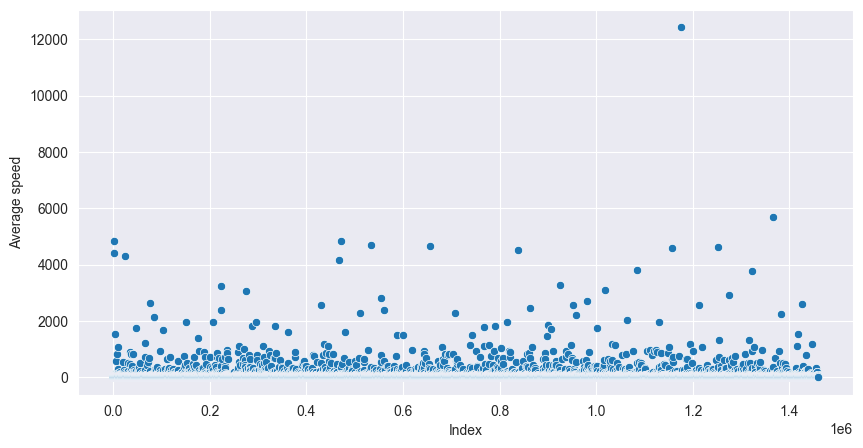

<IPython.core.display.Javascript object>

In [378]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч!

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч.


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных.

б) Сколько выбросов по признаку скорости вам удалось найти?

In [383]:
print('Shape of data: ', taxi_data.shape)

Shape of data:  (1458644, 26)


<IPython.core.display.Javascript object>

In [384]:
print('Поездок, с длительностью больше 24ч: ',
      (taxi_data["trip_duration"] > 24 * 60 * 60).sum())

Поездок, с длительностью больше 24ч:  4


<IPython.core.display.Javascript object>

Удаляем выбросы с длительностью больше 24ч

In [388]:
taxi_data = taxi_data.drop(taxi_data
                           [taxi_data["trip_duration"] > 24 * 60 * 60].index)

<IPython.core.display.Javascript object>

In [390]:
print('Shape of data: ', taxi_data.shape)

Shape of data:  (1458640, 26)


<IPython.core.display.Javascript object>

In [392]:
taxi_data["avg_speed"] = avg_speed

<IPython.core.display.Javascript object>

Считаем кол-во выбросов по признаку скорости свыше 300 км/ч

In [394]:
print(avg_speed[avg_speed > 300].shape[0])

407


<IPython.core.display.Javascript object>

Удаляем кол-во выбросов по скорости свыше 300 км/ч

In [396]:
taxi_data = taxi_data.drop(taxi_data[taxi_data["avg_speed"] >= 300].index)

<IPython.core.display.Javascript object>

In [397]:
print('Shape of data: ', taxi_data.shape)

Shape of data:  (1458233, 27)


<IPython.core.display.Javascript object>

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных;
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [399]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

<IPython.core.display.Javascript object>

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log).
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным?
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$.

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

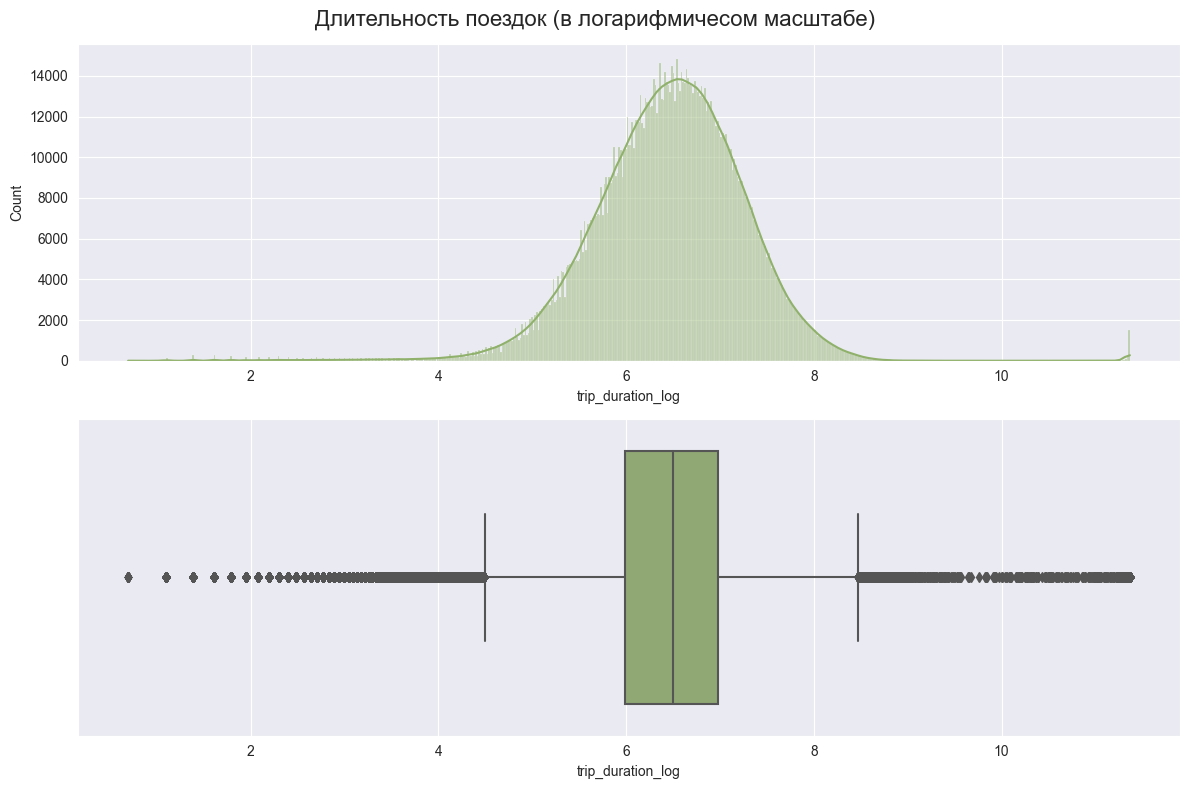

P-value:  0.0
Распределение не является нормальным


<IPython.core.display.Javascript object>

In [409]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
fig.suptitle('Длительность поездок (в логарифмичесом масштабе)', fontsize=16)
sns.histplot(taxi_data, x='trip_duration_log', kde=True,
             color='#90b16b', ax=ax[0])
sns.boxplot(taxi_data, x='trip_duration_log', color='#90b16b', ax=ax[1])
plt.tight_layout()
plt.show()


# Проверяем свою гипотезу с помощью теста Д’Агостино-Пирсона
stat, p_value = stats.normaltest(taxi_data['trip_duration_log'])


print('P-value: ', (round(p_value, 2)))


# Сравниваем P-value с уровнем значимости 0.05
if p_value > 0.05:
    print('Распределение является нормальным')
else:
    print('Распределение не является нормальным')

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id).

Сравните два распределения между собой.

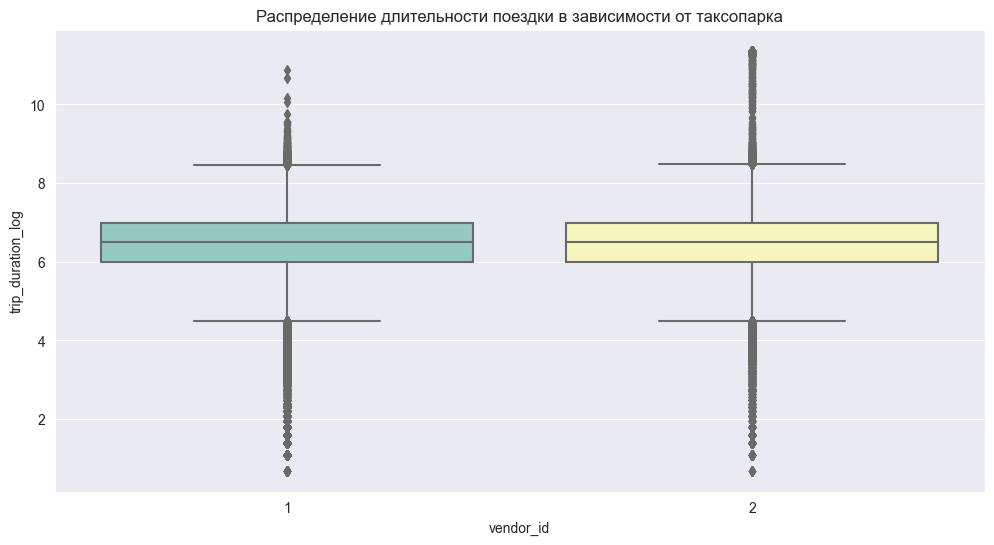

<IPython.core.display.Javascript object>

In [421]:
plt.figure(figsize=(12, 6))
sns.set_style('darkgrid')
sns.boxplot(x='vendor_id', y='trip_duration_log',
            data=taxi_data, palette='Set3')
plt.title('Распределение длительности поездки в зависимости от таксопарка')
plt.xlabel('vendor_id')
plt.ylabel('trip_duration_log')
plt.xticks()
plt.yticks()
plt.show()

Вывод: распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag).

Сравните два распределения между собой.

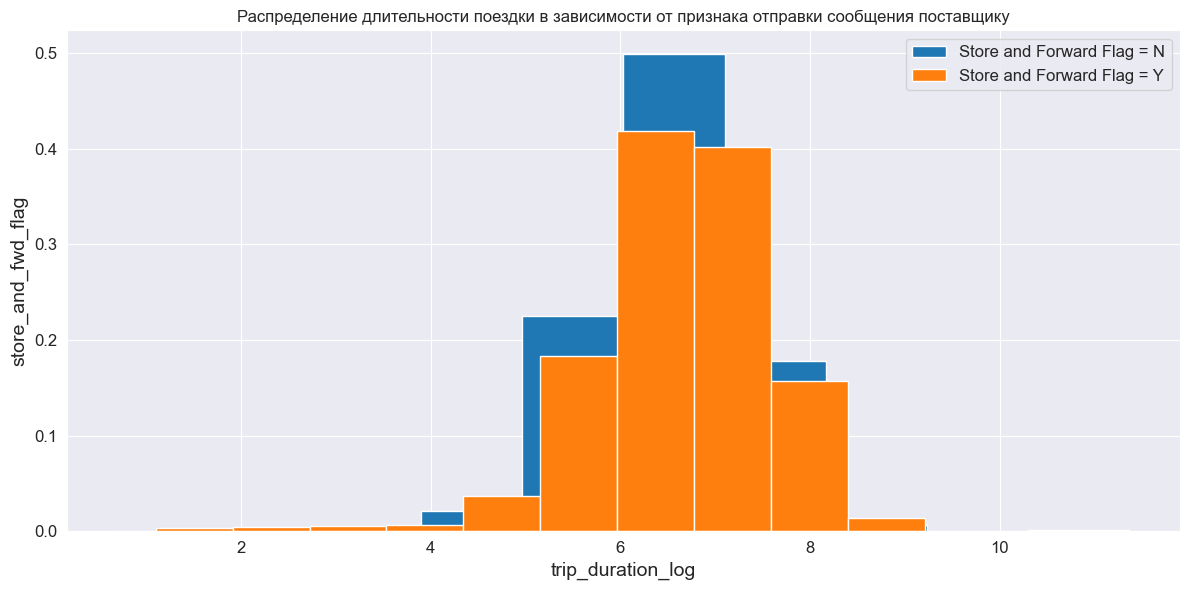

<IPython.core.display.Javascript object>

In [424]:
plt.figure(figsize=(12, 6))
plt.title('Распределение длительности поездки в зависимости от признака отправки сообщения поставщику')

plt.hist(data=taxi_data[taxi_data['store_and_fwd_flag'] == 'N'],
         x='trip_duration_log',
         density=True,
         label='Store and Forward Flag = N')

plt.hist(data=taxi_data[taxi_data['store_and_fwd_flag'] == 'Y'],
         x='trip_duration_log',
         density=True,
         label='Store and Forward Flag = Y')

plt.xlabel('trip_duration_log', fontsize=14)
plt.ylabel('store_and_fwd_flag', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Вывод: Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

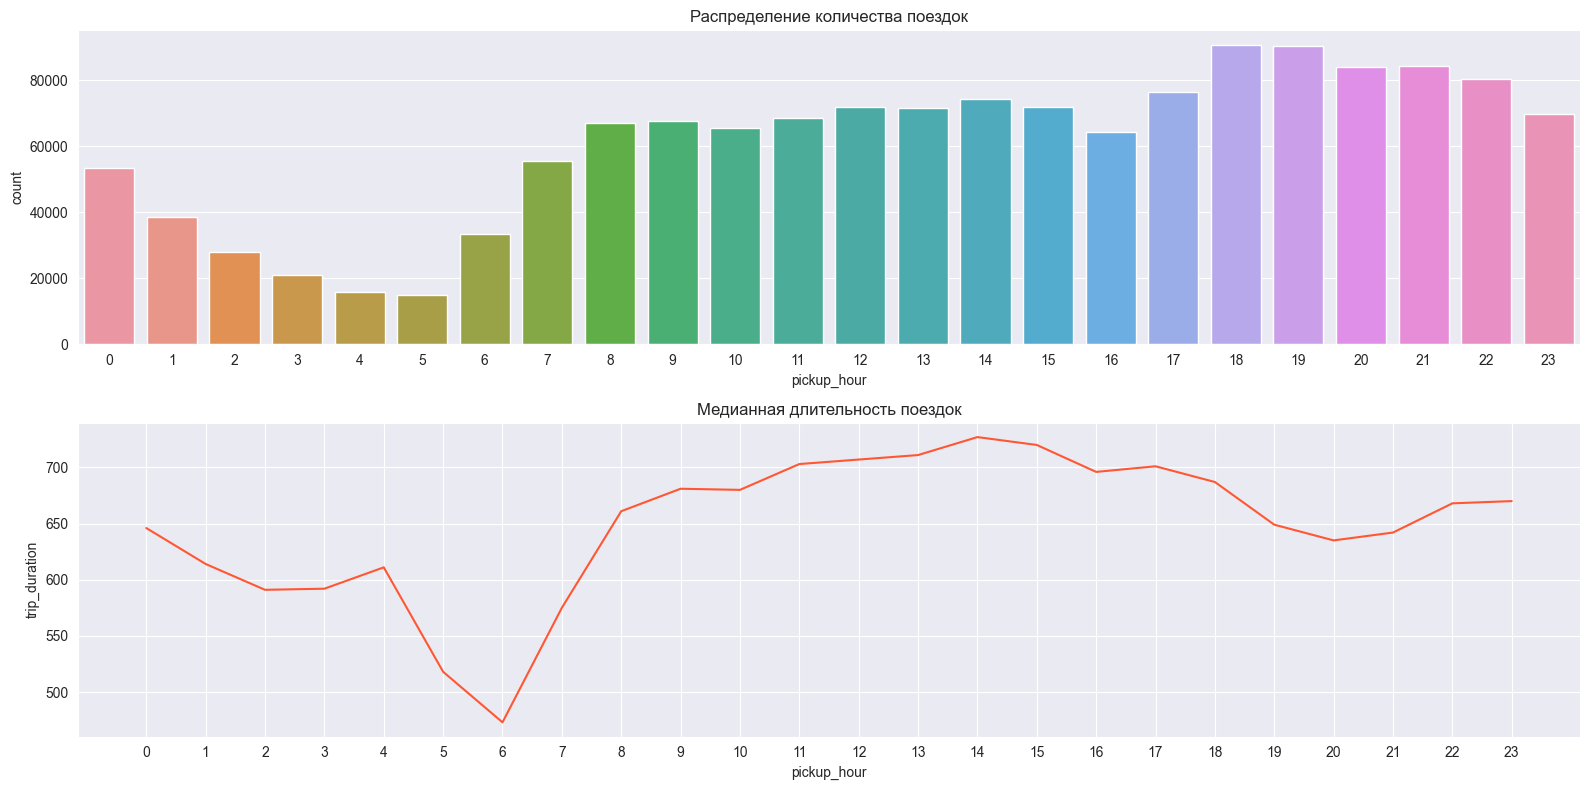

<IPython.core.display.Javascript object>

In [427]:
median_duration_trip = taxi_data.groupby(
    'pickup_hour')['trip_duration'].median()


fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
sns.countplot(data=taxi_data, x='pickup_hour', ax=ax[0])
ax[0].set_title('Распределение количества поездок')
sns.lineplot(data=median_duration_trip, ax=ax[1], color="#FF5733")
ax[1].xaxis.set_ticks(median_duration_trip.index)
ax[1].set_title('Медианная длительность поездок')
plt.tight_layout()
plt.show()

такси заказывают реже всего с 00:00 по 5:00

наблюдается пик медианной длительности поездок с 13:00 по 18:00

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


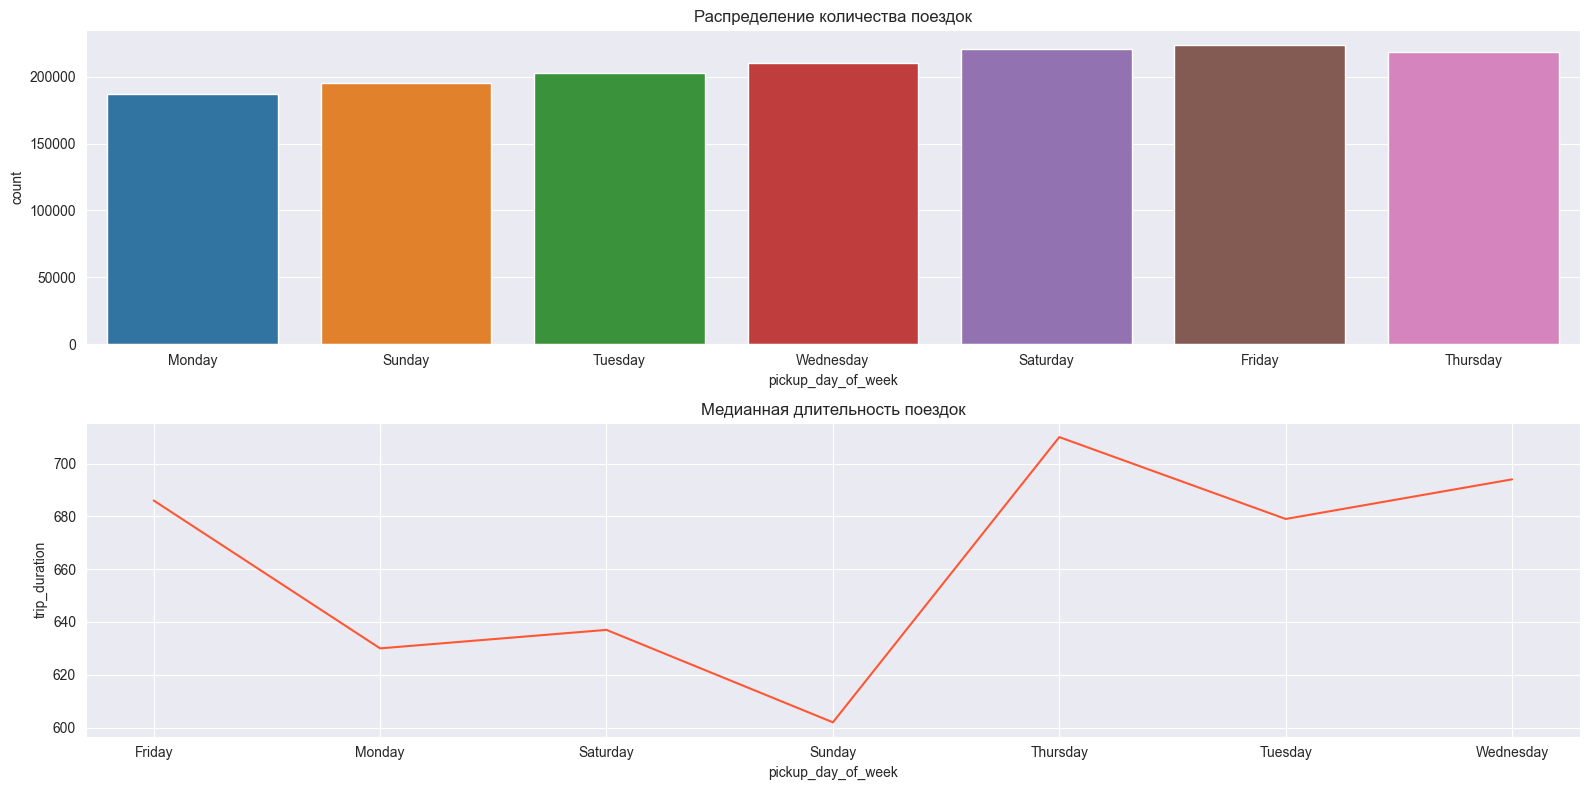

<IPython.core.display.Javascript object>

In [429]:
# Группируем данные по дню недели и считаем медианную длительность поездок
median_duration_week = taxi_data.groupby(
    'pickup_day_of_week')['trip_duration'].median()

# Строим столбчатую диаграмму и линейный график
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
sns.countplot(data=taxi_data, x='pickup_day_of_week', ax=ax[0])
ax[0].set_title('Распределение количества поездок')
sns.lineplot(data=median_duration_week, ax=ax[1], color="#FF5733")
ax[1].xaxis.set_ticks(median_duration_week.index)
ax[1].set_title('Медианная длительность поездок')
plt.tight_layout()
plt.show()

В какой день недели совершается больше всего поездок? Пятница (Friday)

В какой день недели медианная длительность поездок наименьшая? Воскресенье (Sunday)

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно.

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration).

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

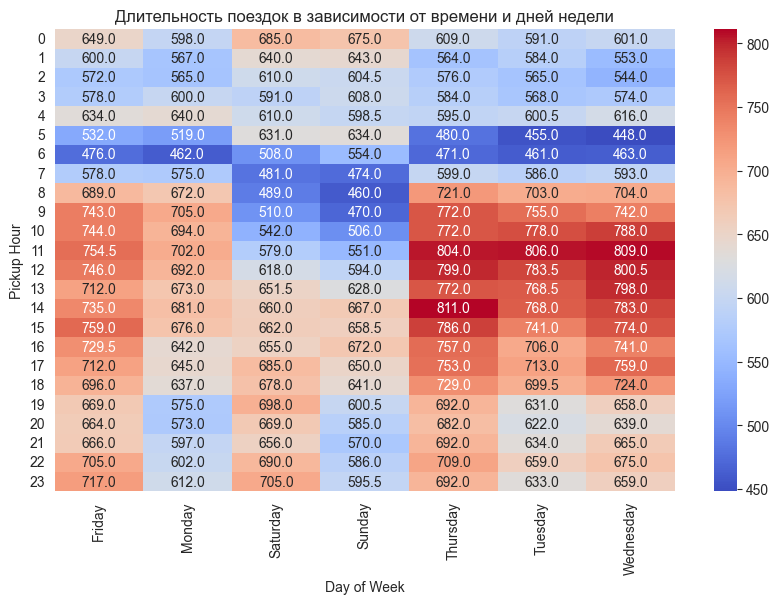

<IPython.core.display.Javascript object>

In [432]:
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
plt.title("Длительность поездок в зависимости от времени и дней недели")
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".1f", cbar=True)

plt.xlabel("Day of Week")
plt.ylabel("Pickup Hour")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов. Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude)
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude).
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:

city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее.

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.


(40.63, 40.85)

/Users/stas/Library/Python/3.10/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/stas/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


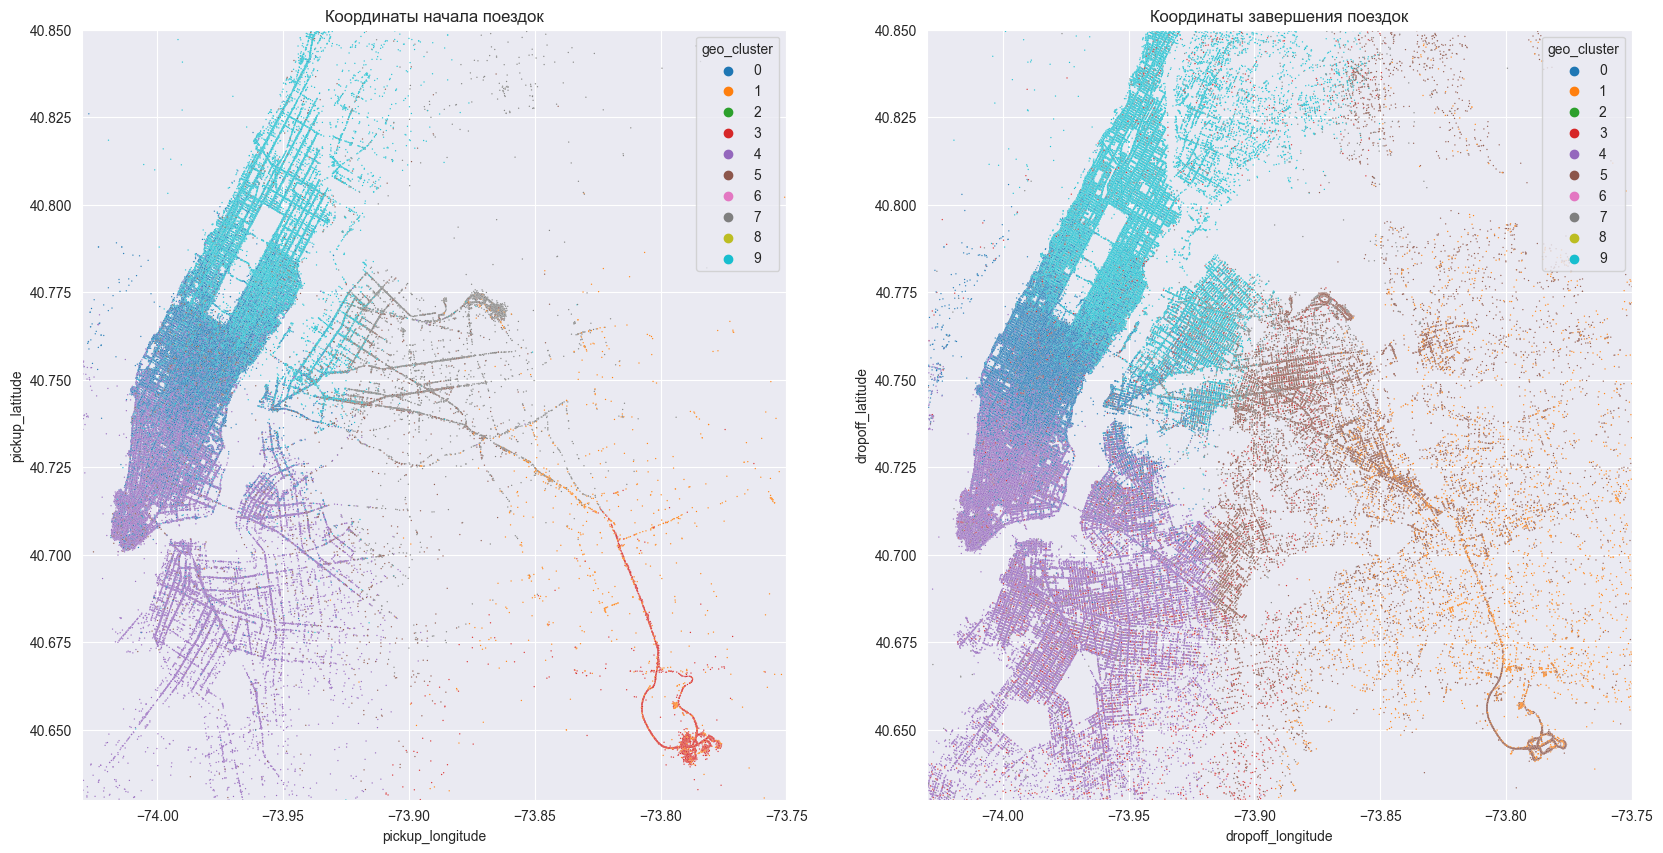

<IPython.core.display.Javascript object>

In [434]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# Построит диаграммы рассеяния:
# 1. С координатами начала поездок
# 2. С координатами завершения поездок
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

pickup = sns.scatterplot(
    data=taxi_data,
    x='pickup_longitude',
    y='pickup_latitude',
    hue='geo_cluster',
    s=1,
    ax=ax[0],
    palette='tab10'
    )
pickup.set_title('Координаты начала поездок')
pickup.set_xlim(city_long_border)
pickup.set_ylim(city_lat_border)

dropoff = sns.scatterplot(
    data=taxi_data,
    x='dropoff_longitude',
    y='dropoff_latitude',
    hue='geo_cluster',
    s=1,
    ax=ax[1],
    palette='tab10'
    )
dropoff.set_title('Координаты завершения поездок')
dropoff.set_xlim(city_long_border)
dropoff.set_ylim(city_lat_border)

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [436]:
print('Shape of data: ', taxi_data.shape)
print('Columns: {}', taxi_data.columns)

Shape of data:  (1458233, 28)
Columns: {} Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log'],
      dtype='object')


<IPython.core.display.Javascript object>

Для удобства работы сделаем копию исходной таблицы с поездками:

In [438]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,avg_speed,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,15.896176,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,13.646335,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,18.747119,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,14.932028,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,13.364690,6.077642


<IPython.core.display.Javascript object>

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках.

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [440]:
train_data = train_data.drop(['id', 'dropoff_datetime', 'avg_speed'], axis=1)
print('Shape of data: ', train_data.shape)

Shape of data:  (1458233, 25)


<IPython.core.display.Javascript object>

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [442]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data: ', train_data.shape)

Shape of data:  (1458233, 23)


<IPython.core.display.Javascript object>

### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [445]:
train_data["vendor_id"] = train_data[
    "vendor_id"].apply(lambda x: 0 if x == 1 else 1)
train_data["store_and_fwd_flag"] = train_data[
    "store_and_fwd_flag"].apply(lambda x: 0 if x == "N" else 1)
print('Среднее по закодированному столбцу vendor_id:',
      round(train_data['vendor_id'].mean(), 2))
print('Среднее по закодированному столбцу store_and_fwd_flag:',
      round(train_data['store_and_fwd_flag'].mean(), 3))

Среднее по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


<IPython.core.display.Javascript object>

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events.


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [448]:
from sklearn.preprocessing import OneHotEncoder
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создаём экземпляр класса OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first')

# Применяем к выбранным столбцам OneHotEncoder
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change])

# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# Создаём датафрейм из закодированных признаков
data_onehot = pd.DataFrame(data_onehot.toarray(), columns=column_names)

# Выводим результат
print('Сгенерировано бинарных столбцов: ', (data_onehot.shape[1]))

Сгенерировано бинарных столбцов:  18


<IPython.core.display.Javascript object>

In [449]:
data_onehot.head()

,pickup_day_of_week_Monday,pickup_day_of_week_Saturday,pickup_day_of_week_Sunday,pickup_day_of_week_Thursday,pickup_day_of_week_Tuesday,pickup_day_of_week_Wednesday,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

Добавим полученную таблицу с закодированными признаками:

In [453]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1),
     data_onehot], axis=1)
print('Shape of data: ', train_data.shape)

Shape of data:  (1458233, 38)


<IPython.core.display.Javascript object>

Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [455]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

<IPython.core.display.Javascript object>

Все наши модели мы будем обучать на логарифмированной версии y_log.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [457]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log,
    test_size=0.33,
    random_state=42
)

<IPython.core.display.Javascript object>

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [459]:
from sklearn.feature_selection import SelectKBest, f_regression
# Создаём объект класса SelectKBest с 25 признаками
k_best = SelectKBest(score_func=f_regression, k=25)
# Отбираем признаки по тренировочной выборке
k_best.fit_transform(X_train, y_train_log)
# Получаем индексы отобранных признаков
best_features = k_best.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
print(best_features)

['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_Monday'
 'pickup_day_of_week_Saturday' 'pickup_day_of_week_Sunday'
 'pickup_day_of_week_Thursday' 'pickup_day_of_week_Tuesday'
 'pickup_day_of_week_Wednesday' 'geo_cluster_1' 'geo_cluster_3'
 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


<IPython.core.display.Javascript object>

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [462]:
from sklearn.preprocessing import MinMaxScaler

# Создаём объект класса MinMaxScaler
scaler = MinMaxScaler()

# Масштабируем значения признаков тренировочной выборки
X_train = scaler.fit_transform(X_train)

# Масштабируем значения признаков валидационной выборки
X_valid = scaler.transform(X_valid)

# Выводим результат для валидационной выборки
print('среднее арифметическое для первого предиктора: ',
      round(X_valid[:, 0].mean(), 2))

среднее арифметическое для первого предиктора:  0.54


<IPython.core.display.Javascript object>

In [464]:
# Переводим X_train и X_valid из массива в датафреймы
X_train = pd.DataFrame(X_train, columns=best_features)
X_valid = pd.DataFrame(X_valid, columns=best_features)

<IPython.core.display.Javascript object>

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [466]:
# Импортируем класс LinearRegression
from sklearn.linear_model import LinearRegression

# Создаём модель-объект класса LinearRegression
linear_model = LinearRegression()

# Обучаем модель на тренировочной выборке
linear_model.fit(X_train, y_train_log)

# Предсказываем значения на тренировочной выборке
y_train_pred = linear_model.predict(X_train)

# Предсказываем значения на валидационной выборке
y_valid_pred = linear_model.predict(X_valid)

<IPython.core.display.Javascript object>

In [470]:
# Функция для рассчета RMSLE
def rmsle(y_true, y_pred):
    return round(metrics.mean_squared_error(y_true, y_pred, squared=False), 2)


# Считаем метрику RMSLE на тренировочной выборке
print('RMSLE на тренировочной выборке: ', rmsle(y_train_log, y_train_pred))
# Считаем метрику RMSLE на валидационной выборке
print('RMSLE на валидационной выборке: ', rmsle(y_valid_log, y_valid_pred))

RMSLE на тренировочной выборке:  0.54
RMSLE на валидационной выборке:  0.54


<IPython.core.display.Javascript object>

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [472]:
# Импортируем класс PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Создаём объект класса PolynomialFeatures 2-ой степени
poly = PolynomialFeatures(degree=2, include_bias=False)

# Генерируем полиномиальные признаки на тренировочной выборке
X_train_poly = poly.fit_transform(X_train)
# Генерируем полиномиальные признаки на валидационной выборке
X_valid_poly = poly.fit_transform(X_valid)

# Создаём модель-объект класса LinearRegression
linear_model_poly = LinearRegression()
# Обучеине
linear_model_poly.fit(X_train_poly, y_train_log)
# Предсказываем значения на тренировочной выборке
y_train_poly_pred = linear_model_poly.predict(X_train_poly)
# Предсказываем значения на валидационной выборке
y_valid_poly_pred = linear_model_poly.predict(X_valid_poly)


print("RMSLE train_poly:", rmsle(y_train_log, y_train_poly_pred))
print("RMSLE valid:", rmsle(y_valid_log, y_valid_poly_pred))

RMSLE train_poly: 0.47
RMSLE valid: 0.7


<IPython.core.display.Javascript object>

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [475]:
from sklearn.linear_model import Ridge
# Создаём модель класса Ridge
ridge = Ridge(alpha=1)
# Обучаем
ridge.fit(X_train_poly, y_train_log)
# Предсказываем значения на тренировочной выборке
y_train_ridge_pred = ridge.predict(X_train_poly)
# Предсказываем значения на валидационной выборке
y_valid_ridge_pred = ridge.predict(X_valid_poly)

print("RMSLE train_ridge:", rmsle(y_train_log, y_train_ridge_pred))
print("RMSLE valid_ridge:", rmsle(y_valid_log, y_valid_ridge_pred))


RMSLE train_ridge: 0.48
RMSLE valid_ridge: 0.48


<IPython.core.display.Javascript object>

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [478]:
# Создаём модель-объект класса DecisionTreeRegressor
detrreg = tree.DecisionTreeRegressor()
# Обучаем
detrreg.fit(X_train, y_train_log)

# Предсказываем значения на тренировочной и валидационной выборке
y_train_detrreg_pred = detrreg.predict(X_train)
y_valid_detrreg_pred = detrreg.predict(X_valid)


print("RMSLE train_detrreg:", rmsle(y_train_log, y_train_detrreg_pred))
print("RMSLE valid_detrreg:", rmsle(y_valid_log, y_valid_detrreg_pred))

RMSLE train_detrreg: 0.0
RMSLE valid_detrreg: 0.56


<IPython.core.display.Javascript object>

Наблюдаются ли у вашей модели признаки переобучения? Да!

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [486]:
# Создаем функцию для проверки деревьев
def rmsle_lists_depths(max_depths,
                       X_train, y_train_log, X_valid, y_valid_log,
                       y_train_detrreg_pred, y_valid_detrreg_pred):
    rmsle_train = []
    rmsle_valid = []

    for max_depth in max_depths:
        detrreg = tree.DecisionTreeRegressor(max_depth=max_depth)
        detrreg.fit(X_train, y_train_log)

        y_train_detrreg_pred = detrreg.predict(X_train)
        y_valid_detrreg_pred = detrreg.predict(X_valid)

        rmsle_detrreg_train = metrics.mean_squared_error(
            y_train_log,
            y_train_detrreg_pred,
            squared=False
        )

        rmsle_detrreg_valid = metrics.mean_squared_error(
            y_valid_log,
            y_valid_detrreg_pred,
            squared=False
        )

        rmsle_train.append(rmsle_detrreg_train)
        rmsle_valid.append(rmsle_detrreg_valid)

    return rmsle_train, rmsle_valid

<IPython.core.display.Javascript object>

In [488]:
# Cоздаём список всех возможных вариантов от 7 до 20 деревьев
max_depths = range(7, 20)
# подгружаем данные
rmsle_train, rmsle_valid = rmsle_lists_depths(
    max_depths,
    X_train, y_train_log, X_valid, y_valid_log,
    y_train_detrreg_pred, y_valid_detrreg_pred
    )


<IPython.core.display.Javascript object>

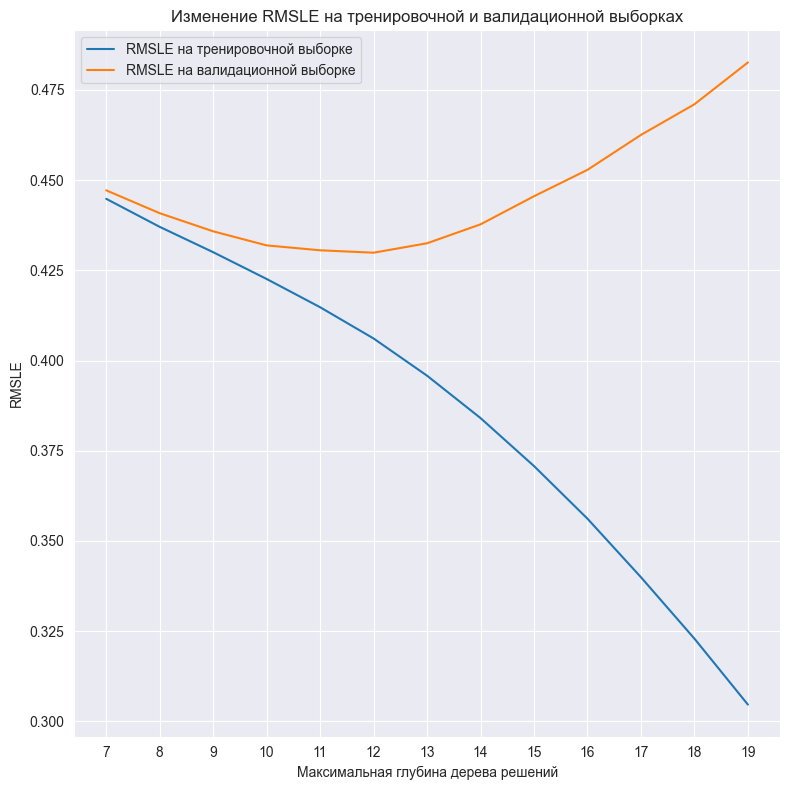

<IPython.core.display.Javascript object>

In [490]:
# Строим линейные графики изменения метрики RMSLE
plt.subplots(figsize=(8, 8))
plt.plot(max_depths, rmsle_train, label='RMSLE на тренировочной выборке')
plt.plot(max_depths, rmsle_valid, label='RMSLE на валидационной выборке')
plt.xlabel('Максимальная глубина дерева решений')
plt.ylabel('RMSLE')
plt.title('Изменение RMSLE на тренировочной и валидационной выборках')
plt.xticks(max_depths)
plt.legend()
plt.tight_layout()
plt.show()

Оптимальная глубина дерева 12

In [492]:
# Создаём модель-объект класса DecisionTreeRegressor с глубиной 12
detrreg = tree.DecisionTreeRegressor(max_depth=12)
# Обучаем
detrreg.fit(X_train, y_train_log)


y_train_detrreg_pred = detrreg.predict(X_train)
y_valid_detrreg_pred = detrreg.predict(X_valid)


print("RMSLE train_detrreg:", rmsle(y_train_log, y_train_detrreg_pred))
print("RMSLE valid_detrreg:", rmsle(y_valid_log, y_valid_detrreg_pred))

RMSLE train_detrreg: 0.41
RMSLE valid_detrreg: 0.43


<IPython.core.display.Javascript object>

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [496]:
# Импортируем класс RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Создаём модель-объект класса RandomForestRegressor
rf_model = ensemble.RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)

# Обучаем модель на тренировочной выборке
rf_model.fit(X_train, y_train_log)

# Предсказываем значения на тренировочной выборке
y_train_rf_model_pred = rf_model.predict(X_train)

# Предсказываем значения на валидационной выборке
y_valid_rf_model_pred = rf_model.predict(X_valid)

# Считаем метрику RMSLE на тренировочной выборке
print('RMSLE на тренировочной выборке: ',
      rmsle(y_train_log, y_train_rf_model_pred))

# Считаем метрику RMSLE на валидационной выборке
print('RMSLE на валидационной выборке: ',
      rmsle(y_valid_log, y_valid_rf_model_pred))

RMSLE на тренировочной выборке:  0.4
RMSLE на валидационной выборке:  0.41


<IPython.core.display.Javascript object>

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6,
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [499]:
# Создаём модель-объект класса GradientBoostingRegressor
gb_model = ensemble.GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
)

# Обучаем модель
gb_model.fit(X_train, y_train_log)

# Предсказываем значения на тренировочной выборке
y_train_gb_model_pred = gb_model.predict(X_train)

# Предсказываем значения на валидационной выборке
y_valid_gb_model_pred = gb_model.predict(X_valid)

# Считаем метрику RMSLE на тренировочной выборке
print('RMSLE на тренировочной выборке: ',
      rmsle(y_train_log, y_train_gb_model_pred))

# Считаем метрику RMSLE на валидационной выборке
print('RMSLE на валидационной выборке: ',
      rmsle(y_valid_log, y_valid_gb_model_pred))

RMSLE на тренировочной выборке:  0.37
RMSLE на валидационной выборке:  0.39


<IPython.core.display.Javascript object>

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Ответ: Градиентный бустинг над деревьями решений

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


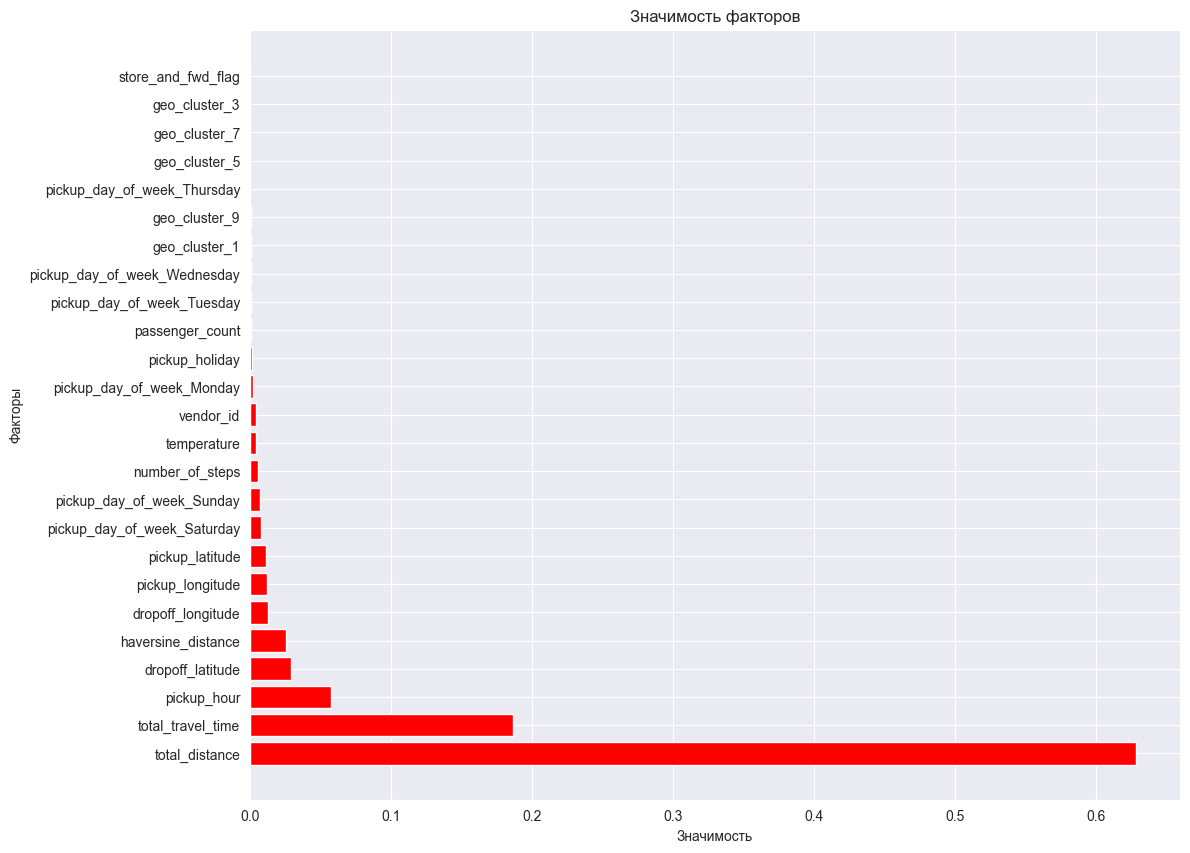

<IPython.core.display.Javascript object>

In [501]:
fig = plt.figure(figsize=(12, 10))
sorted_idx = gb_model.feature_importances_.argsort()[::-1]
plt.barh(X_train.columns[sorted_idx],
         gb_model.feature_importances_[sorted_idx], color='red')
plt.title('Значимость факторов')
plt.xlabel('Значимость')
plt.ylabel('Факторы')
plt.show()

total_distance, total_travel_time, pickup_hour топ 3 фактора

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [503]:
y_true = np.exp(y_train_log) - 1
y_pred = np.exp(y_train_gb_model_pred) - 1

MeAE = round(metrics.median_absolute_error(y_true, y_pred) / 60, 1)
print('MeAE в минутах: ', MeAE)

MeAE в минутах:  1.8


<IPython.core.display.Javascript object>

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных.

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [505]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

<IPython.core.display.Javascript object>

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [508]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot],
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Shape of data: (625134, 25)


<IPython.core.display.Javascript object>

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [509]:
test_data.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,...,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_9,events_None,events_Rain,events_Snow
0,id3004672,0,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,0,2016-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,id3505355,0,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,id1217141,0,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,0,2016-06-30,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,id2150126,1,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,0,2016-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,id1598245,0,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,0,2016-06-30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<IPython.core.display.Javascript object>

In [511]:
# Предсказываем значения целевой переменной на тестовой
# выборке с помощью обученной модели градиентного бустинга
y_test_pred_log = gb_model.predict(X_test_scaled)

# Переводим предсказания из логарифмического маштаба в истинный
y_test_predict = np.exp(y_test_pred_log) - 1

# Cоздаём Submission-файл
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


<IPython.core.display.Javascript object>

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
# pip install xgboost

После чего модуль можно импортировать:

In [512]:
import xgboost as xgb

<IPython.core.display.Javascript object>

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [514]:
X_train_scaled = X_train
X_valid_scaled = X_valid

<IPython.core.display.Javascript object>

In [516]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

<IPython.core.display.Javascript object>

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [517]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9,
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1,
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:5.42218	valid-rmse:5.42190
[10]	train-rmse:1.93553	valid-rmse:1.93541
[20]	train-rmse:0.78535	valid-rmse:0.78616
[30]	train-rmse:0.47936	valid-rmse:0.48139
[40]	train-rmse:0.42167	valid-rmse:0.42442
[50]	train-rmse:0.40977	valid-rmse:0.41301
[60]	train-rmse:0.40448	valid-rmse:0.40807
[70]	train-rmse:0.40128	valid-rmse:0.40520
[80]	train-rmse:0.39862	valid-rmse:0.40283
[90]	train-rmse:0.39727	valid-rmse:0.40181
[100]	train-rmse:0.39546	valid-rmse:0.40028
[110]	train-rmse:0.39396	valid-rmse:0.39908
[120]	train-rmse:0.39291	valid-rmse:0.39829
[130]	train-rmse:0.39188	valid-rmse:0.39748
[140]	train-rmse:0.39086	valid-rmse:0.39682
[150]	train-rmse:0.38967	valid-rmse:0.39594
[160]	train-rmse:0.38893	valid-rmse:0.39554
[170]	train-rmse:0.38790	valid-rmse:0.39473
[180]	train-rmse:0.38728	valid-rmse:0.39435
[190]	train-rmse:0.38668	valid-rmse:0.39406
[200]	train-rmse:0.38601	valid-rmse:0.39375
[210]	train-rmse:0.38510	valid-rmse:0.39321
[220]	train-rmse:0.38446	valid-rmse:0.39295

<IPython.core.display.Javascript object>

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [518]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39086


<IPython.core.display.Javascript object>

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

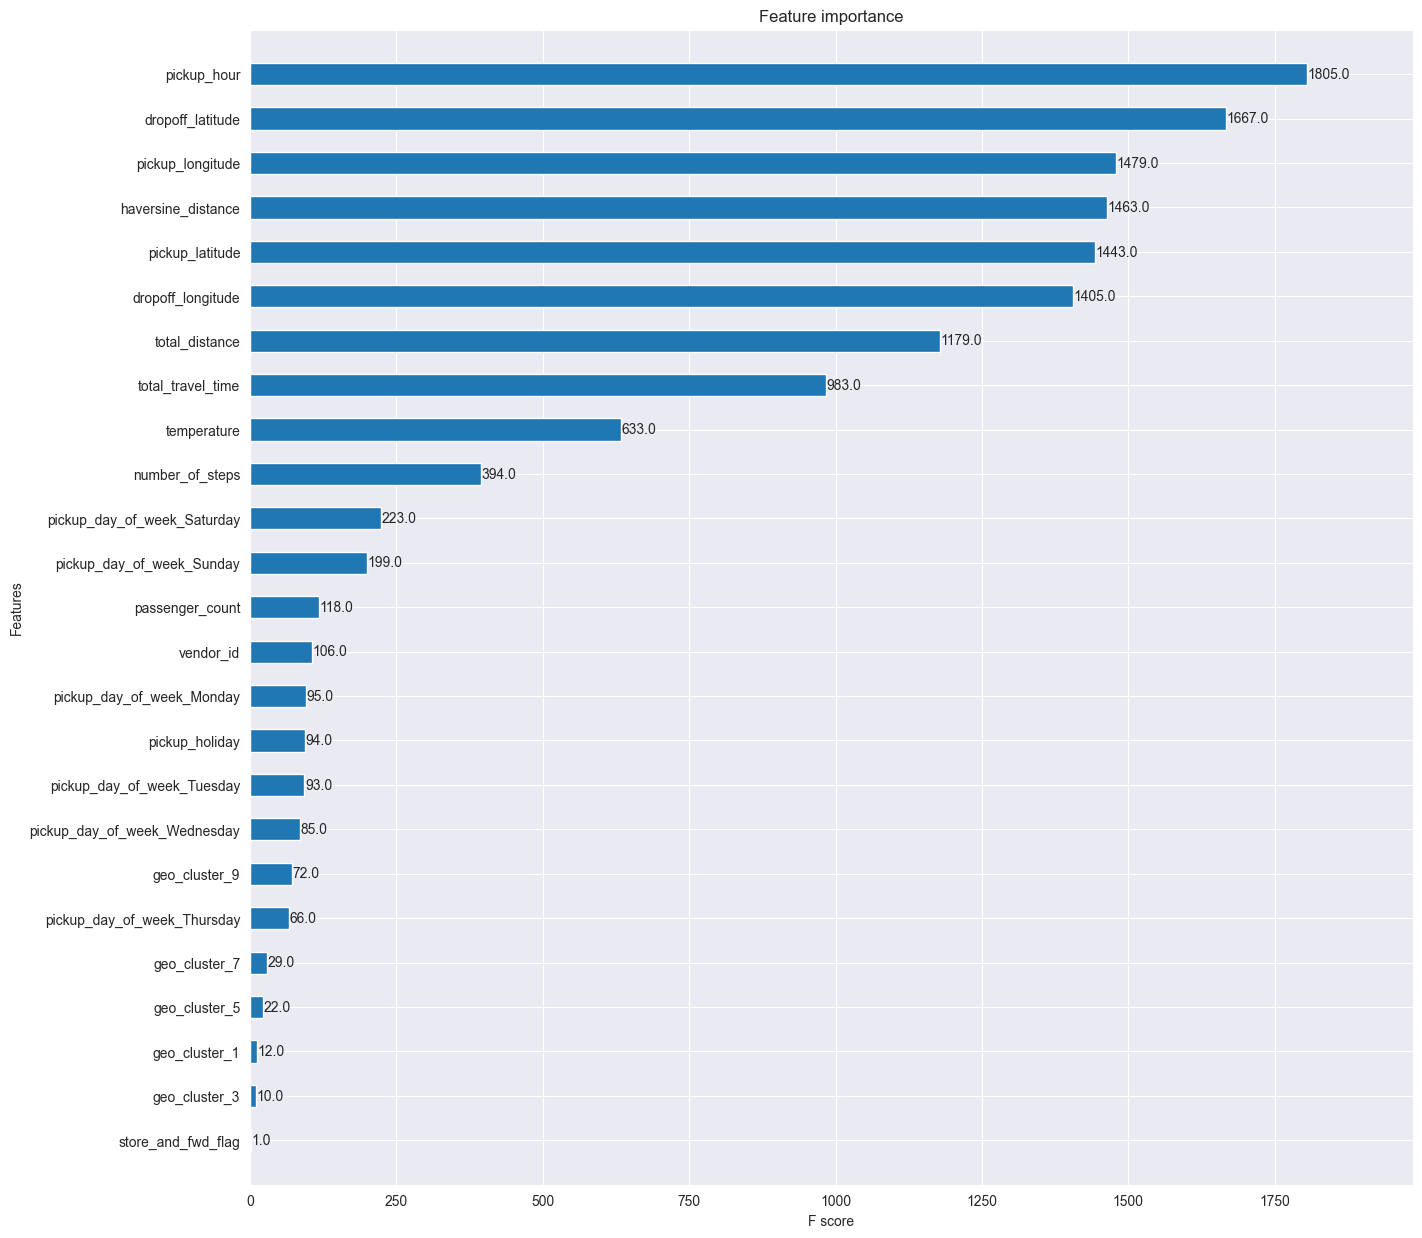

<IPython.core.display.Javascript object>

In [519]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)